# Algorithms - Graphs

## Exercise 1: Graph Making

### 1.1: Write a function called make_simple_graph that returns the graph object that represents the following diagram:

![ex2](../assets/exercise2.png)

In [ ]:

#import networkx as nx 
#G = nx.Graph([
#G.add_edge(1,3)
#G.add_node(5)
#nx.draw(G,with_labels=True,node_color='pink')
#G = nx.binomial_graph(10, 0.3, directed=True)
# access node  :  G[0]
#Show a nodes: G.nodes
#Scarce Matrix:
    #import numpy as np 
    #nx.adjacency_matrix(G) 
    #nx.adjacency_matrix(G).todense()



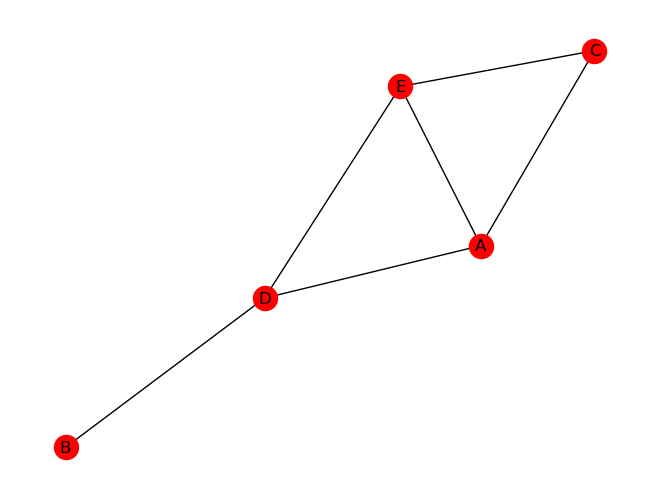

In [1]:
# exercise 1.1
import networkx as nx
G= nx.Graph([('C','E'),('A','C'),('A','E'),('A','D'),('E','D'),('D','B')])
nx.draw(G, with_labels=True, node_color='red')

### 1.2: computing node degrees of graphs

For the graph made by your function in the previous exercise, calculate the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_degrees` which takes a networkx graph object as input, and returns a `dict` with the degrees of all the nodes in the graph.

**NOTE:** You cannot use the diameter or degree method from networkx directly to compute the degrees. 

```
compute_degrees(G) -> {
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}
```

In [2]:
# exercise 1.2
#Algorithm:
#1- We use a networkx built-in method: 
#   .nodes : it return the nodes from a graph
#2- We loop into each node to check its number of connections
from collections import Counter

def compute_degrees(G):
    #count = Counter()
    counts = {}
    nodelist = G.nodes
    for n in nodelist:
        atlasdic = (G[n]) #returns an AtlasView dictionary
        for k, v in atlasdic.items():
            #the loops count here, represent the amount of links
            #We don't actually use k or v
            label = str('degree_')+str(n)
            if counts.get(label,None):
                counts[label]+=1
            else:
                counts[label]=1
        
    return dict(counts)


compute_degrees(G)


{'degree_C': 2, 'degree_E': 3, 'degree_A': 3, 'degree_D': 3, 'degree_B': 1}

### 1.3: An airline route map graph

CBDS Airlines has the following route map for the cities that it services, where every pair of cities has service in both directions between the cities:

```
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

```

Copy this data into a networkX graph to answer the question.

1. What is the maximum number of hops that would ever be taken by a passenger on a single trip between any two serviced cities?

2. If you were a rich jet-setter traveling everywhere in across the country and were constrained to fly CBDS, which city would be the most optimal place for you to live, to minimize the number of hops you would have to make on average as you jet from home to your latest vacation spot?


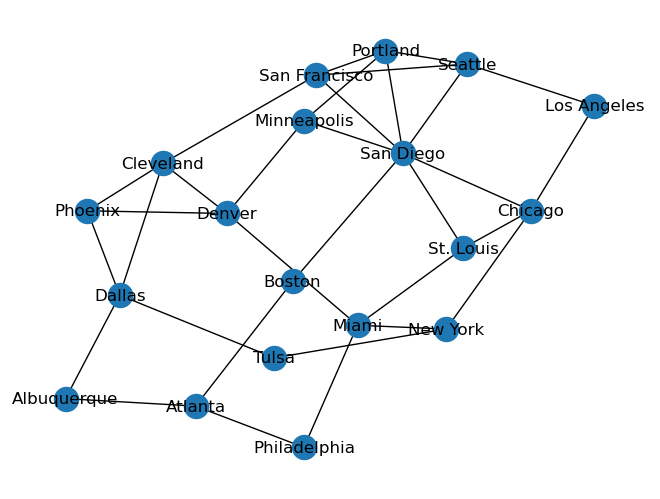

In [20]:
# exercise 1.3

#Let's visualize the grid

routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]
G=nx.Graph(routemap)
nx.draw(G, with_labels=True)


In [4]:
compute_degrees(G)


{'degree_St. Louis': 3,
 'degree_Miami': 4,
 'degree_San Diego': 7,
 'degree_Chicago': 4,
 'degree_San Francisco': 4,
 'degree_Minneapolis': 3,
 'degree_Boston': 2,
 'degree_Portland': 4,
 'degree_Seattle': 4,
 'degree_Tulsa': 2,
 'degree_New York': 3,
 'degree_Dallas': 4,
 'degree_Phoenix': 3,
 'degree_Cleveland': 4,
 'degree_Denver': 4,
 'degree_Los Angeles': 2,
 'degree_Philadelphia': 2,
 'degree_Atlanta': 3,
 'degree_Albuquerque': 2}

In [5]:
G.edges

EdgeView([('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Minneapolis', 'Denver'), ('Minneapolis', 'Portland'), ('Boston', 'Atlanta'), ('Portland', 'Seattle'), ('Seattle', 'Los Angeles'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Dallas', 'Phoenix'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Cleveland', 'Denver'), ('Philadelphia', 'Atlanta'), ('Atlanta', 'Albuquerque')])

In [ ]:
##1. Max number of hops



### > > >>> This Box is a Failed attempt to compute the shortest path by reccurrence <<< < <###
### > > >>> With more Time I would have tried something with running Threads <<< < < ###



#Assumptions:
# Between 2 cities, we will always take the shortest path.
#This will be achieved by reccurrence. 
#the shortest path will stop the reccurrence execution 1st

#Note:
#We don't use Queue or Stacks here, because using it is sequential.
#i.e when dequeuing neighbors one after another, 
#it makes it difficult to keep track of hops count on a specific path
#=> we need some sort of parallel search

#Algorithm for Hops count: 
#1- We run a reccuring exploration of the vertexes
#2-    'path' is unique on each reccurrence : Each time a unvisited neighbor is explored, a hop is added
#3- The reccurrence is stopped when the destination is found among the neighbor
#3- We return the maximum hops found between 2 cities ( on the shortest path)


"""
from time import sleep
from multiprocessing import Process
 

def maxNumberHops(graph, start, stop, path, hops):
    
    print('hops:', hops)
    print('path:', path, '\n')
    
    path.append(start)
    if stop in path:
            
        print('Final hops:', hops)
        print('Final path:', path, '\n\n')
        return hops
    
    hops += 1
         
    if stop in graph[start]:  #the shortest path is prioritized 
        neighbor = stop
        return maxNumberHops(graph, neighbor, stop,  path, hops)     
    else:
        for neighbor in graph[start]:
            if neighbor not in path: #Nodes not explored yet
                return maxNumberHops(graph, neighbor, stop,  path, hops)     
            
maxNumberHops(G, 'Tulsa', 'Cleveland',  path=[None], hops=0)"""


In [48]:
###1. Max number of hops ( Suite)

#Algorithm: we compare cities to cities hops, and report the largest hops
#We use a method called .shortest_path to find out the shortest path between 2 cities in the graph
#The key=(start,stop) / Value=hops, pair is stored in a dictionary


tripHops = {} 
for start in G.nodes:
    for stop in G.nodes:
        if start == stop:
            continue
        else:
            transits = nx.shortest_path(G, source=start, target=stop, weight=None, method='dijkstra')
            print((start,stop),' : ', transits)
            tripHops[(start,stop)] = len(transits)-1
            print(tripHops[(start,stop)], '\n')
    

('St. Louis', 'Miami')  :  ['St. Louis', 'Miami']
1 

('St. Louis', 'San Diego')  :  ['St. Louis', 'San Diego']
1 

('St. Louis', 'Chicago')  :  ['St. Louis', 'Chicago']
1 

('St. Louis', 'San Francisco')  :  ['St. Louis', 'San Diego', 'San Francisco']
2 

('St. Louis', 'Minneapolis')  :  ['St. Louis', 'San Diego', 'Minneapolis']
2 

('St. Louis', 'Boston')  :  ['St. Louis', 'San Diego', 'Boston']
2 

('St. Louis', 'Portland')  :  ['St. Louis', 'San Diego', 'Portland']
2 

('St. Louis', 'Seattle')  :  ['St. Louis', 'San Diego', 'Seattle']
2 

('St. Louis', 'Tulsa')  :  ['St. Louis', 'Chicago', 'New York', 'Tulsa']
3 

('St. Louis', 'New York')  :  ['St. Louis', 'Chicago', 'New York']
2 

('St. Louis', 'Dallas')  :  ['St. Louis', 'Miami', 'New York', 'Tulsa', 'Dallas']
4 

('St. Louis', 'Phoenix')  :  ['St. Louis', 'Miami', 'Denver', 'Phoenix']
3 

('St. Louis', 'Cleveland')  :  ['St. Louis', 'Miami', 'Denver', 'Cleveland']
3 

('St. Louis', 'Denver')  :  ['St. Louis', 'Miami', 'Denver'

In [49]:
###1. Max number of hops ( Suite)
#Algorithm:
#We take the key which hops value is higher

def get_MaxTrip(val):
    for k, v in tripHops.items():
        if v == val:
            return k

maxTripValue = max(tripHops.values())
get_MaxTrip(maxTripValue)



('Los Angeles', 'Albuquerque')

In [ ]:
###2. minimize the number of hops you would have to make on average 
#as you jet from home to your latest vacation spot?

In [67]:
#Algorithm:
#A- To do this, we calculate the average 'hops' score of each city to one another
#B- The city with the lowest average wins a new Jet Setter

#tripHops Format : 
# { (start,stop): hops }

cities_hop_score = {}

for city in G.nodes:
    count_commutes =0
    for (start, stop), hops in tripHops.items():

        #print('start:', start)
        #print('stop:', stop)
        if start==city or stop ==city:
            
            count_commutes +=1 # used to calculate the number of city connection and calculate the mean hops
            
            score = int(tripHops[(start, stop)])
            #print('score :',score)
                             
            if cities_hop_score.get(city) is None:
                cities_hop_score[city] = score
                #print('     Score: ', score)
            else:
                cities_hop_score[city] += score
                #print('     Score: ', score)
                             
        #print('Sum Score: ', int(cities_hop_score[city]))
        #print('count_commutes: ', count_commutes, '\n')
    #print(cities_hop_score, '\n')                    
    cities_hop_score[city]= round(cities_hop_score[city]/count_commutes, 2) #2 digit . decimal
        

cities_hop_score     
            



{'St. Louis': 2.28,
 'Miami': 2.17,
 'San Diego': 1.89,
 'Chicago': 2.28,
 'San Francisco': 2.17,
 'Minneapolis': 2.33,
 'Boston': 2.44,
 'Portland': 2.39,
 'Seattle': 2.44,
 'Tulsa': 2.72,
 'New York': 2.33,
 'Dallas': 2.44,
 'Phoenix': 2.56,
 'Cleveland': 2.17,
 'Denver': 2.22,
 'Los Angeles': 2.89,
 'Philadelphia': 2.72,
 'Atlanta': 2.56,
 'Albuquerque': 2.89}

In [69]:
def get_bestcommute_city(val):
    for k, v in cities_hop_score.items():
        if v == val:
            return k
        
get_bestcommute_city(min(cities_hop_score.values()))

'San Diego'